<a href="https://colab.research.google.com/github/ozh-ai/Tiktok-Tech-Jam-2025/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [454]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin

In [455]:
# a. Data Collection

df = pd.read_csv("sample_data/reviews_labeled.csv")

In [456]:
# b. Exploratory Data Analysis

df.head(10)

,business_name,author_name,text,photo,rating,rating_category,label
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,normal
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,normal
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere,normal
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere,normal
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu,normal
5,Haci'nin Yeri - Yigit Lokantasi,Arda Karaca,Generally good.,dataset/indoor_atmosphere/hacinin_yeri_arda_ka...,4,indoor_atmosphere,normal
6,Haci'nin Yeri - Yigit Lokantasi,İrem Eren,What you see is 125 TL in total. It's a pretty...,dataset/taste/hacinin_yeri_irem_eren.png,5,taste,normal
7,Haci'nin Yeri - Yigit Lokantasi,Nadia Salim,Delicious food at rock bottom prices. Friendly...,dataset/taste/hacinin_yeri_nadia_salim.png,5,taste,normal
8,Haci'nin Yeri - Yigit Lokantasi,Mehmet Eser,"Every time I go, I still experience the amazem...",dataset/outdoor_atmosphere/hacinin_yeri_mehmet...,5,outdoor_atmosphere,normal
9,Haci'nin Yeri - Yigit Lokantasi,Celal Ozer,The most f/p of all businesses I've seen.,dataset/indoor_atmosphere/hacinin_yeri_celal_o...,5,indoor_atmosphere,normal


In [457]:
df.shape

(1945, 7)

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1945 non-null   object
 1   author_name      1945 non-null   object
 2   text             1945 non-null   object
 3   photo            1601 non-null   object
 4   rating           1945 non-null   int64 
 5   rating_category  1945 non-null   object
 6   label            1945 non-null   object
dtypes: int64(1), object(6)
memory usage: 106.5+ KB


In [459]:
df['label'].nunique()

4

In [460]:
df['label'].value_counts()

,count
label,
normal,1100
advertisement,297
non_visitor,276
irrelevant,272


In [461]:
# c. Feature Engineering

encode = {"normal":0, "advertisement":1, "irrelevant":2, "non_visitor":3}
df['label_encode'] = df['label'].map(encode)


In [462]:
df.head(10)

,business_name,author_name,text,photo,rating,rating_category,label,label_encode
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,normal,0
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,normal,0
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere,normal,0
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere,normal,0
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu,normal,0
5,Haci'nin Yeri - Yigit Lokantasi,Arda Karaca,Generally good.,dataset/indoor_atmosphere/hacinin_yeri_arda_ka...,4,indoor_atmosphere,normal,0
6,Haci'nin Yeri - Yigit Lokantasi,İrem Eren,What you see is 125 TL in total. It's a pretty...,dataset/taste/hacinin_yeri_irem_eren.png,5,taste,normal,0
7,Haci'nin Yeri - Yigit Lokantasi,Nadia Salim,Delicious food at rock bottom prices. Friendly...,dataset/taste/hacinin_yeri_nadia_salim.png,5,taste,normal,0
8,Haci'nin Yeri - Yigit Lokantasi,Mehmet Eser,"Every time I go, I still experience the amazem...",dataset/outdoor_atmosphere/hacinin_yeri_mehmet...,5,outdoor_atmosphere,normal,0
9,Haci'nin Yeri - Yigit Lokantasi,Celal Ozer,The most f/p of all businesses I've seen.,dataset/indoor_atmosphere/hacinin_yeri_celal_o...,5,indoor_atmosphere,normal,0


In [463]:
df['text_length'] = df['text'].apply(len)

In [464]:
df.head(10)

,business_name,author_name,text,photo,rating,rating_category,label,label_encode,text_length
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,normal,0,680
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,normal,0,914
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere,normal,0,173
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere,normal,0,63
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu,normal,0,161
5,Haci'nin Yeri - Yigit Lokantasi,Arda Karaca,Generally good.,dataset/indoor_atmosphere/hacinin_yeri_arda_ka...,4,indoor_atmosphere,normal,0,15
6,Haci'nin Yeri - Yigit Lokantasi,İrem Eren,What you see is 125 TL in total. It's a pretty...,dataset/taste/hacinin_yeri_irem_eren.png,5,taste,normal,0,245
7,Haci'nin Yeri - Yigit Lokantasi,Nadia Salim,Delicious food at rock bottom prices. Friendly...,dataset/taste/hacinin_yeri_nadia_salim.png,5,taste,normal,0,70
8,Haci'nin Yeri - Yigit Lokantasi,Mehmet Eser,"Every time I go, I still experience the amazem...",dataset/outdoor_atmosphere/hacinin_yeri_mehmet...,5,outdoor_atmosphere,normal,0,157
9,Haci'nin Yeri - Yigit Lokantasi,Celal Ozer,The most f/p of all businesses I've seen.,dataset/indoor_atmosphere/hacinin_yeri_celal_o...,5,indoor_atmosphere,normal,0,41


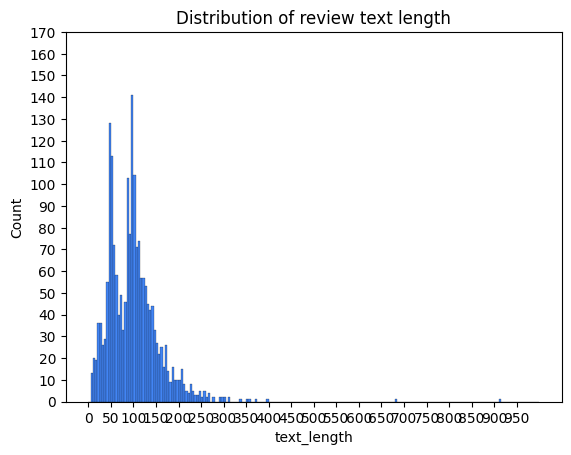

In [465]:
ax = sns.histplot(df['text_length'], binrange=(0, 1000), binwidth=5, color='#4285F4', alpha=1)

ax.set_xticks(range(0, 1000, 50))
ax.set_yticks(range(0, 180, 10))

plt.title('Distribution of review text length')
plt.show()


In [466]:
X = df[['text', 'text_length']]
y = df['label_encode']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [468]:
class LinkDetector(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Regex to catch:
        #  - http/https URLs
        #  - www. links
        #  - Any domain with at least 2 letters in the extension
        self.pattern = re.compile(
            r'(https?://\S+|www\.\S+|\S+\.[a-z]{2,})',
            re.IGNORECASE
        )

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # X will be a pandas Series
        return X.str.contains(self.pattern).astype(int).to_frame(name="contains_link")

In [469]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2)), 'text'),
        ('num', StandardScaler(), ['text_length']),
        ('link', LinkDetector(), 'text')
    ],
    remainder='drop'
)

In [471]:
pipeline = Pipeline([
    ('features', preprocessor),
    ('classifier', XGBClassifier(
        objective="multi:softmax",
        num_class=4,
        eval_metric="mlogloss",
        learning_rate=0.1,
        max_depth=10,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

pipeline.fit(X_train, y_train)

/tmp/ipython-input-4196599397.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return X.str.contains(self.pattern).astype(int).to_frame(name="contains_link")


Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=5000,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'text'),
                                                 ('num', StandardScaler(),
                                                  ['text_length']),
                                                 ('link', LinkDetector(),
                                                  'text')])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsampl...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1, num_class=4, ...))])

In [472]:
# Evaluation
target_names = ["Normal", "Advertisement", "Irrelevant", "Non-visitor"]

y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       Normal       1.00      0.99      0.99       220
Advertisement       1.00      1.00      1.00        60
   Irrelevant       0.98      0.98      0.98        54
  Non-visitor       0.98      1.00      0.99        55

     accuracy                           0.99       389
    macro avg       0.99      0.99      0.99       389
 weighted avg       0.99      0.99      0.99       389

Confusion Matrix:
[[218   0   1   1]
 [  0  60   0   0]
 [  1   0  53   0]
 [  0   0   0  55]]


/tmp/ipython-input-4196599397.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return X.str.contains(self.pattern).astype(int).to_frame(name="contains_link")


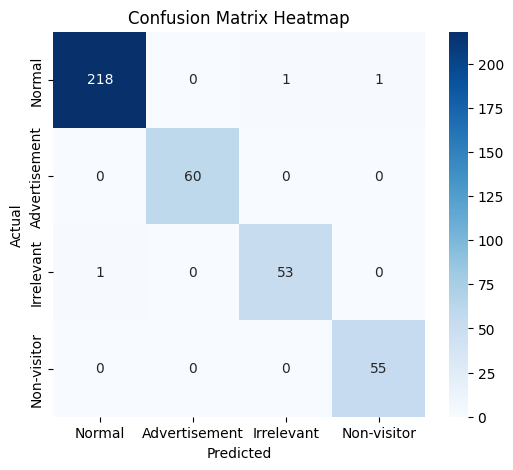

In [473]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

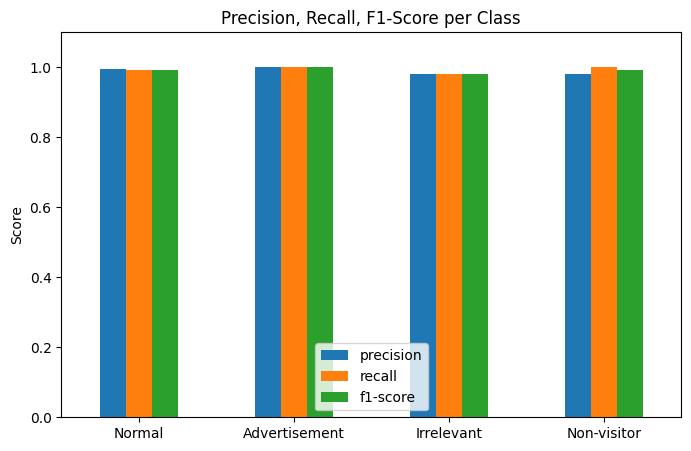

In [474]:
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:-3, :3]  # Exclude accuracy, macro avg, weighted avg
metrics_df.plot(kind='bar', figsize=(8,5))
plt.title("Precision, Recall, F1-Score per Class")
plt.ylabel("Score")
plt.ylim(0,1.1)
plt.xticks(rotation=0)
plt.show()

# **Evaludation and Findings**

# **1. Dataset and Features**

- Multiclass labels:
`0 = Normal review`, `1 = Advertisement`, `2 = Irrelevant`, `3 = Non-visitor`.

Input features:

- Text: review_text (TF-IDF of unigrams + bigrams, max 5000 features)

- Metadata: text_length of review

- Training: XGBoostClassifier, 300 trees, max depth 10, learning rate 0.1

# **2. Performance Metrics**

- Overall accuracy: 99% on current test set

- Class-wise F1-score:

- Normal: 0.99

- Advertisement: 1.00

- Irrelevant: 0.98

- Non-visitor: 0.99

- Based on the confusion matrix, most misclassifications are rare, with a few normal reviews misclassified as irrelevant or from a non-visitor.

# **3. Insights**

- The model correctly identifies advertisements via keyword patterns (URLs, promotional terms).

- Non-visitor rants are captured with cues like exaggerated complaints or generic negative language.

- Short or off-topic reviews are flagged as irrelevant.

- Most normal reviews contain genuine comments about the location and are accurately classified.

# **4. Limitations**

- Current dataset is small; perfect accuracy may not generalize to larger, more diverse reviews.

- XGBoost Classifer might overfit on the data and perform poorly on external datasets.

- Some overlapping language between ads and normal positive reviews could be misclassified in larger datasets.

- Relevancy detection is partially heuristic; additional features like GPS proximity or user history could improve robustness.

# **5. Recommendations**

- Deploy as a review quality filter API, flagging potential spam/irrelevant reviews before publishing.

- Extend the model with additional metadata: user review history, posting time, or location distance.

- Consider ensemble with transformer embeddings (BERT or RoBERTa) for improved semantic understanding in complex reviews.

- Continuously evaluate on incoming review data to maintain high accuracy.

# **Test on another dataset (Demo)**

In [475]:
with open("sample_data/Alaska.json", "r", encoding="utf-8") as f:
    raw = f.read()

# Replace single quotes with double quotes (basic fix)
fixed_json_str = raw.replace("'", '"')

with open("sample_data/Alaska_fixed.json", "w", encoding="utf-8") as f:
    f.write(fixed_json_str)

In [476]:
import json
import re

data_list = []

with open("sample_data/Alaska_fixed.json", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue

        # Replace only keys' single quotes with double quotes (avoid breaking text)
        # Example: {'key': 'value'} -> {"key": "value"}
        line_fixed = re.sub(r"(?<=\{|,)\s*'([^']+)'\s*:", r'"\1":', line)
        line_fixed = re.sub(r":\s*'([^']*)'", r': "\1"', line_fixed)

        try:
            obj = json.loads(line_fixed)
            data_list.append(obj)
        except json.JSONDecodeError as e:
            continue

# Convert to DataFrame
Alaska_data = pd.json_normalize(data_list)

In [477]:
Alaska_data.head(10)

,user_id,name,time,rating,text,pics,resp,gmap_id,resp.time,resp.text
0,109129804842686204152,Nicki Gore,1566331951619,5,We always stay here when in Valdez for silver ...,None,NaN,0x56b646ed2220b77f:0xd8975e316de80952,NaN,NaN
1,113240926405758965692,Allen Ratliff,1504917982385,5,Great campground for the price. Nice hot unlim...,None,NaN,0x56b646ed2220b77f:0xd8975e316de80952,NaN,NaN
2,115738865548796071801,Victoria Cook,1466170294782,5,"Great, slept like a bear. Clean, convenient, c...",None,NaN,0x56b646ed2220b77f:0xd8975e316de80952,NaN,NaN
3,115658246644483827476,Crystal Dahle,1630382185833,2,Not a lot going on here since it moved from do...,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
4,116978519893930605788,Holly Anne,1629595392534,4,None,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
5,109748980961787042558,Emma Forsberg,1629598102068,5,None,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
6,106927921983372472765,sherry miller,1630540491895,5,None,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
7,117655458045608856003,Amy Lieb,1630292802235,4,None,None,NaN,0x56c8992b5dee7225:0x9f7f4bf151868cf7,NaN,NaN
8,108676492248120451765,Cre•dence 52,1630669457601,5,Matt was honest and did the work done as promi...,None,NaN,0x56c8e0455225be87:0xf24828df75e2f8ae,NaN,NaN
9,110352467269495760166,Jennifer Seutter,1559572834719,5,"Always great service, honest and fast.",None,NaN,0x56c8e0455225be87:0xf24828df75e2f8ae,NaN,NaN


In [478]:
Alaska_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457338 entries, 0 to 457337
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    457338 non-null  object 
 1   name       457338 non-null  object 
 2   time       457338 non-null  int64  
 3   rating     457338 non-null  int64  
 4   text       237306 non-null  object 
 5   pics       16428 non-null   object 
 6   resp       0 non-null       float64
 7   gmap_id    457338 non-null  object 
 8   resp.time  30638 non-null   float64
 9   resp.text  30638 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 34.9+ MB


In [479]:
Alaska_data.shape

(457338, 10)

In [487]:
Alaska_data = Alaska_data[['text']]

In [485]:
violation_data = pd.read_csv("60000_reviews.csv")
violation_data = violation_data[['text']]

In [486]:
violation_data.head(10)

,text
0,SPECIAL OFFER! Enjoy 38% OFF on burger at Busi...
1,"I also read about science fiction, totally unr..."
2,My friend told me the experience was popular. ...
3,Our signature steak is a must-try this week. B...
4,"My favorite food is coffee, but I haven't trie..."
5,"I haven't visited Business35, but heard it is ..."
6,"I haven't visited Business41, but heard it is ..."
7,"I spent the afternoon photography, which was m..."
8,My friend told me the experience was amazing. ...
9,I would need to go there personally to leave a...


In [488]:
data = pd.concat([Alaska_data, violation_data], axis = 0)
data = data.reset_index(drop = True)

data.sample(10)

,text
100229,Great service and great food
163234,Great people and superb food
388036,None
245706,Thanks for having your outdoor seating available!
238205,None
329321,None
42810,"Got pizza had hardy no sauce, also got cheese ..."
262281,None
185447,None
240836,Always great products at a great price!


In [489]:
data.dropna(subset=['text'], inplace = True)

In [490]:
data.shape

(284653, 1)

In [491]:
data['text_length'] = data['text'].apply(len)

In [493]:
data.head(10)

,text,text_length
0,We always stay here when in Valdez for silver ...,175
1,Great campground for the price. Nice hot unlim...,134
2,"Great, slept like a bear. Clean, convenient, c...",73
3,Not a lot going on here since it moved from do...,133
8,Matt was honest and did the work done as promi...,55
9,"Always great service, honest and fast.",38
10,Probably the best service in the Valley.,40
11,Fixed camper,12
14,It is the most beautiful awesome clean smellin...,143
18,Nice Room. Get to Know Other Guest. Makes aBet...,86


In [494]:
# Select features in the same format as training
X_data = data[['text', 'text_length']]

# Predict
data_preds = pipeline.predict(X_data)

# Add predictions to the dataset
data['predicted_label'] = data_preds

# Optional: map numeric labels to names
label_map = {0: "Normal", 1: "Advertisement", 2: "Irrelevant", 3: "Non-visitor"}
data['predicted_label_name'] = data['predicted_label'].map(label_map)

/tmp/ipython-input-4196599397.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  return X.str.contains(self.pattern).astype(int).to_frame(name="contains_link")


In [506]:
# View results
pd.set_option('display.max_colwidth', 80)
print(data[['text', 'predicted_label_name']].sample(20).to_string())

                                                                                                                                                  text predicted_label_name
55173                               Absolutely fantastic service with a smile and amazing coffee. Always reccomend this place. Keep up the good work!!               Normal
501692                                                           Visit www.deals67.com for more details. Book now at book57.com to reserve your table.        Advertisement
466445              SPECIAL OFFER! Enjoy 10% OFF on sushi at Business21! Limited time offer for family dinner! Visit www.deals52.com for more details.        Advertisement
288406                                                                                                                                  Great dog park               Normal
225197                                                                                                                            Mmmm bisco